In [1]:
import pandas as pd

In [2]:
cast = pd.read_csv('cast.csv')

In [8]:
cast.head()

## n - repersent ranking of the movie

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [9]:
## 1. Shape of data

In [10]:
cast.shape

(3611212, 6)

In [11]:
## 2. Analysis columns - missing values

In [12]:
cast.isnull().sum()

title              0
year               0
name               0
type               0
character          0
n            1379242
dtype: int64

In [14]:
cast.isnull().sum().sum() ## Total NaN values

1379242

In [15]:
percentage_nan = (1379242/3611212)*100
percentage_nan

38.19332678336249

In [16]:
percentage_nan = round(percentage_nan, 2)
percentage_nan

38.19

In [17]:
## 38.19% missing values.

In [19]:
## 38.19% of missing values come from n category alone. So better drop this

In [20]:
## 3. Check the data type of dataframe

In [21]:
cast.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

In [24]:
c = cast.set_index('year')
c

,title,name,type,character,n
year,,,,,
2015,Closet Monster,Buffy #1,actor,Buffy 4,NaN
1985,Suuri illusioni,Homo $,actor,Guests,22.0
2017,Battle of the Sexes,$hutter,actor,Bobby Riggs Fan,10.0
2015,Secret in Their Eyes,$hutter,actor,2002 Dodger Fan,NaN
2015,Steve Jobs,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...
1988,Foxtrot,Lilja ??risd?ttir,actress,D?ra,24.0
2004,Niceland (Population. 1.000.002),Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
1985,Skammdegi,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0


In [25]:
c.head()

,title,name,type,character,n
year,,,,,
2015,Closet Monster,Buffy #1,actor,Buffy 4,NaN
1985,Suuri illusioni,Homo $,actor,Guests,22.0
2017,Battle of the Sexes,$hutter,actor,Bobby Riggs Fan,10.0
2015,Secret in Their Eyes,$hutter,actor,2002 Dodger Fan,NaN
2015,Steve Jobs,$hutter,actor,1988 Opera House Patron,NaN


In [26]:
cast.year == 2015

0           True
1          False
2          False
3           True
4           True
           ...  
3611207    False
3611208    False
3611209    False
3611210    False
3611211    False
Name: year, Length: 3611212, dtype: bool

In [28]:
cast[cast.year == 2015]

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
...,...,...,...,...,...,...
3611072,Idealisten,2015,Tammi ?st,actress,"S?ndergaard, Secretary",NaN
3611095,Webbed,2015,Ingrid ?sterhaug,actress,Dommer,NaN
3611120,Kvinner i for store herreskjorter,2015,Gunnhild ?yehaug,actress,Fortellerstemme,29.0
3611123,Kvinner i for store herreskjorter,2015,Ingunn Beate ?yen,actress,Jordmor,16.0


In [29]:
%%timeit
cast[cast.year == 2015]

92.6 ms ± 3.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%%time
cast[cast.year == 2014]

Wall time: 93.8 ms


,title,year,name,type,character,n
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
25,Step Up All In,2014,Jesse 'Casper' Brown,actor,Grim Knight Dancer,61.0
27,Todo x Sara,2014,Gil 'Colibri'Viera,actor,Llavero,NaN
...,...,...,...,...,...,...
3610920,Hadi Insallah,2014,Canan ?zer,actress,Pekmez's Mother,NaN
3610965,Karisik Kaset,2014,?zge ?zpirin?ci,actress,Irem,2.0
3611015,Ask Oyunu,2014,Ebru ?zt?rk,actress,Serpil,4.0
3611026,Yusuf Yusuf,2014,Sinem ?zt?rk,actress,Hatice,NaN


In [33]:
%%time
c.loc[2014]

Wall time: 84.8 ms


,title,name,type,character,n
year,,,,,
2014,"Lapis, Ballpen at Diploma, a True to Life Journey",Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
2014,Desire (III),Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
2014,When the Man Went South,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
2014,Step Up All In,Jesse 'Casper' Brown,actor,Grim Knight Dancer,61.0
2014,Todo x Sara,Gil 'Colibri'Viera,actor,Llavero,NaN
...,...,...,...,...,...
2014,Hadi Insallah,Canan ?zer,actress,Pekmez's Mother,NaN
2014,Karisik Kaset,?zge ?zpirin?ci,actress,Irem,2.0
2014,Ask Oyunu,Ebru ?zt?rk,actress,Serpil,4.0


In [34]:
## using year as index because the wall time is less

In [39]:
import seaborn as sns

In [40]:
## Load an example dataset from the online repository
##     Name of the dataset (``{name}.csv`` on https://github.com/mwaskom/seaborn-data).
df = sns.load_dataset('tips')

In [41]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [44]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [45]:
## No Null values in tips dataframe

In [46]:
a = df.groupby('sex')

In [50]:
a.first() ## showing first values of each group by category

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,10.34,1.66,No,Sun,Dinner,3
Female,16.99,1.01,No,Sun,Dinner,2


In [51]:
df.groupby('sex').groups

{'Male': [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 15, 17, 19, 20, 23, 24, 25, 26, 27, 28, 30, 31, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 88, 89, 90, 91, 95, 96, 97, 98, 99, 105, 106, 107, 108, 110, 112, 113, 116, 120, 122, 123, 126, 129, 130, 138, 141, 142, 148, 149, 150, 151, 152, 153, 154, 156, 159, ...], 'Female': [0, 4, 11, 14, 16, 18, 21, 22, 29, 32, 33, 37, 51, 52, 57, 66, 67, 71, 72, 73, 74, 82, 85, 92, 93, 94, 100, 101, 102, 103, 104, 109, 111, 114, 115, 117, 118, 119, 121, 124, 125, 127, 128, 131, 132, 133, 134, 135, 136, 137, 139, 140, 143, 144, 145, 146, 147, 155, 157, 158, 162, 164, 168, 169, 178, 186, 188, 191, 197, 198, 201, 202, 203, 205, 209, 213, 214, 215, 219, 221, 223, 225, 226, 229, 238, 240, 243]}

In [52]:
df.groupby('sex').ngroups

2

In [53]:
df.groupby('sex').sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [54]:
df.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


In [57]:
df.groupby('sex').size() ## compute group size

sex
Male      157
Female     87
dtype: int64

In [58]:
df.groupby('day').size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

In [60]:
df_female = df.groupby('sex').get_group('Female')

In [61]:
df_female

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2
229,22.12,2.88,Female,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [62]:
df.groupby('sex').sum()

,total_bill,tip,size
sex,,,
Male,3256.82,485.07,413
Female,1570.95,246.51,214


In [63]:
df.groupby('sex').total_bill.sum()

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64

In [64]:
df.groupby(['sex', 'smoker']).sum()

total_bill     tip  size
sex    smoker                          
Male   Yes        1337.07  183.07   150
       No         1919.75  302.00   263
Female Yes         593.27   96.74    74
       No          977.68  149.77   140

In [65]:
df.groupby(['sex', 'smoker']).total_bill.sum()

sex     smoker
Male    Yes       1337.07
        No        1919.75
Female  Yes        593.27
        No         977.68
Name: total_bill, dtype: float64

In [66]:
## Agg function

In [67]:
df.groupby('sex').agg(['max', 'min', 'mean', 'median'])

total_bill                           tip                       size  \
              max   min       mean median   max  min      mean median  max   
sex                                                                          
Male        50.81  7.25  20.744076  18.35  10.0  1.0  3.089618   3.00    6   
Female      44.30  3.07  18.056897  16.40   6.5  1.0  2.833448   2.75    6   

                             
       min      mean median  
sex                          
Male     1  2.630573      2  
Female   1  2.459770      2

In [69]:
df.agg(['max', 'min', 'mean'])

,total_bill,tip,size
max,50.810000,10.000000,6.000000
min,3.070000,1.000000,1.000000
mean,19.785943,2.998279,2.569672


In [70]:
df.groupby('sex').total_bill.agg(['max', 'min', 'mean', 'median'])

,max,min,mean,median
sex,,,,
Male,50.81,7.25,20.744076,18.35
Female,44.30,3.07,18.056897,16.40


In [71]:
df.groupby(['sex', 'smoker']).total_bill.agg(['max', 'min', 'mean', 'median'])

max   min       mean  median
sex    smoker                                
Male   Yes     50.81  7.25  22.284500   20.39
       No      48.33  7.51  19.791237   18.24
Female Yes     44.30  3.07  17.977879   16.27
       No      35.83  7.25  18.105185   16.69

In [72]:
## Question 1: Try to find sum of tips provided by smoker and non-smoker on each day

In [73]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [76]:
df.groupby(['smoker', 'day']).tip.sum()

smoker  day 
Yes     Thur     51.51
        Fri      40.71
        Sat     120.77
        Sun      66.82
No      Thur    120.32
        Fri      11.25
        Sat     139.63
        Sun     180.57
Name: tip, dtype: float64

In [77]:
df.groupby(['smoker', 'day']).sum()

total_bill     tip  size
smoker day                           
Yes    Thur      326.24   51.51    40
       Fri       252.20   40.71    31
       Sat       893.62  120.77   104
       Sun       458.28   66.82    49
No     Thur      770.09  120.32   112
       Fri        73.68   11.25     9
       Sat       884.78  139.63   115
       Sun      1168.88  180.57   167

In [79]:
df.groupby(['smoker', 'day']).size()

smoker  day 
Yes     Thur    17
        Fri     15
        Sat     42
        Sun     19
No      Thur    45
        Fri      4
        Sat     45
        Sun     57
dtype: int64

- Here we can see that 'Smokers' tips is high on sat and 'Smokers' crows is also highest. So as a analyst we can see owner should stock his cigrattes on Friday

In [80]:
## Question 2: Calulate the percentage of female smoker who gave tip

In [82]:
df.groupby(['smoker', 'sex']).get_group(('Yes', 'Female'))

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
103,22.42,3.48,Female,Yes,Sat,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2


In [93]:
df.groupby(['smoker', 'sex']).size()

smoker  sex   
Yes     Male      60
        Female    33
No      Male      97
        Female    54
dtype: int64

In [94]:
## 33 female smoker

In [96]:
df.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

In [98]:
## 87 total Female

In [99]:
smoker_female_percentage = round(33*100/87)
smoker_female_percentage

38

In [100]:
## 38% of female are smokers

### Seaborn - Chart

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

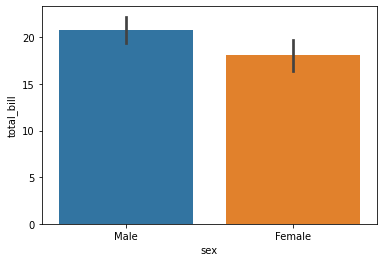

In [103]:
sns.barplot(x = 'sex', y = 'total_bill', data = df) ## Showing the mean

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

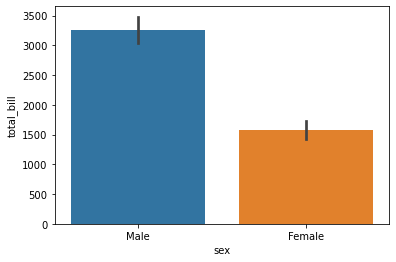

In [105]:
sns.barplot(x='sex', y='total_bill', data=df, estimator=sum)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

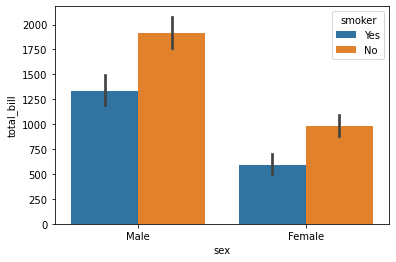

In [106]:
sns.barplot(x='sex', y='total_bill', data=df, estimator=sum, hue = 'smoker')

Text(0, 0.5, 'Total Bill')

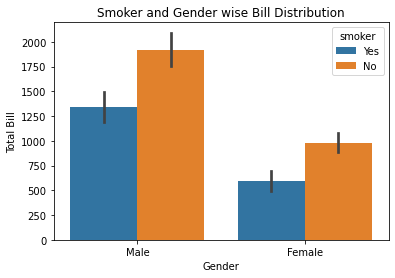

In [110]:
bar1 = sns.barplot(x='sex', y='total_bill', data=df, estimator=sum, hue = 'smoker')
bar1.set_title("Smoker and Gender wise Bill Distribution")
bar1.set_xlabel('Gender')
bar1.set_ylabel('Total Bill')

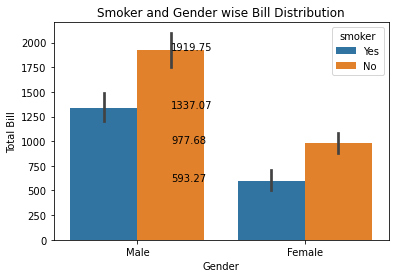

In [115]:
bar1 = sns.barplot(x='sex', y='total_bill', data=df, estimator=sum, hue = 'smoker')
bar1.set_title("Smoker and Gender wise Bill Distribution")
bar1.set_xlabel('Gender')
bar1.set_ylabel('Total Bill')

## For Data Label

for patch in bar1.patches:
    height = patch.get_height()
    width = patch.get_width()
    
    bar1.text(x = width/2, y = height, s= round(height, 2))

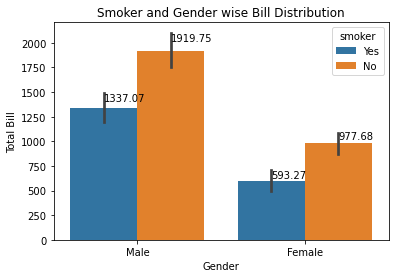

In [135]:
bar1 = sns.barplot(x='sex', y='total_bill', data=df, estimator=sum, hue = 'smoker')
bar1.set_title("Smoker and Gender wise Bill Distribution")
bar1.set_xlabel('Gender')
bar1.set_ylabel('Total Bill')

## For Data Label

for patch in bar1.patches:
    height = patch.get_height()
    width = patch.get_width()
    
    bar1.text(x = (patch.get_x() + width/2), y = 1.05*height, s= round(height, 2))

In [136]:
df.groupby(['sex', 'smoker']).total_bill.sum()

sex     smoker
Male    Yes       1337.07
        No        1919.75
Female  Yes        593.27
        No         977.68
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

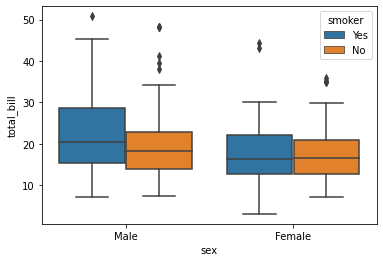

In [137]:
sns.boxplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

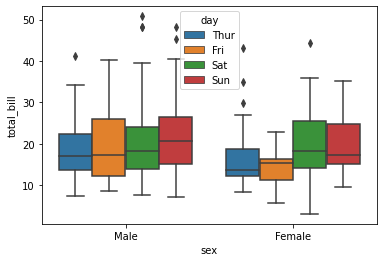

In [138]:
sns.boxplot(x = 'sex', y = 'total_bill', hue = 'day', data = df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

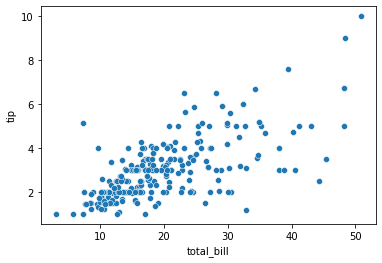

In [139]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

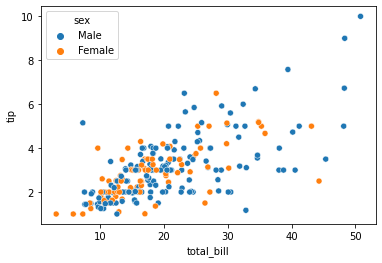

In [141]:
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', data = df)

In [143]:
## Relationship between two variables
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

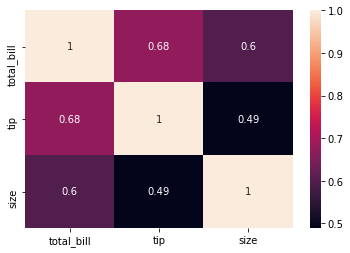

In [145]:
sns.heatmap(df.corr(), annot=True)

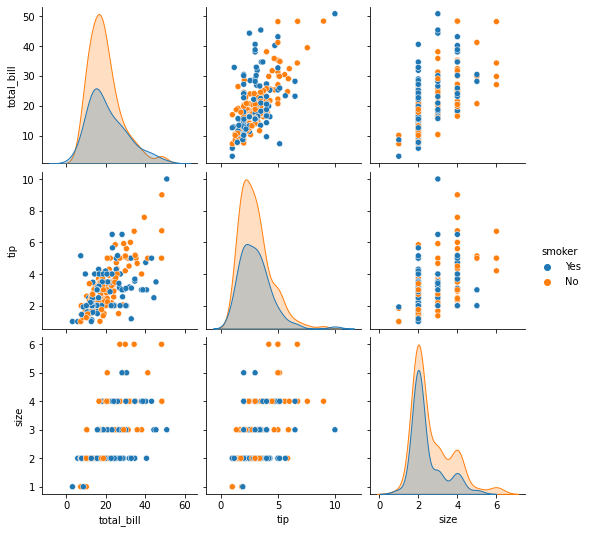

In [147]:
sns.pairplot(df, hue = 'smoker')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

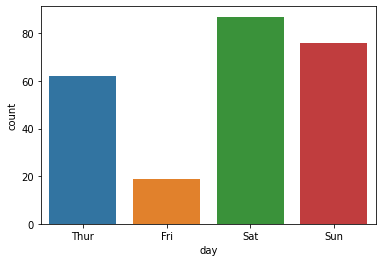

In [148]:
sns.countplot(df['day'])

### Joins

In [150]:
d1 = {"ID": [1,2,3,4,5,6], "Name": ['A', 'B', 'C', 'D', 'E', 'F']}
d2 = {"ID": [2, 3, 5], "Age": [23, 33, 36]}
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)

In [151]:
df1

,ID,Name
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E
5,6,F


In [152]:
df2

,ID,Age
0,2,23
1,3,33
2,5,36


In [153]:
## Joining 2 DataFrames

df3 = df1.merge(df2, how='inner')
df3

,ID,Name,Age
0,2,B,23
1,3,C,33
2,5,E,36


In [155]:
df4 = df1.merge(df2, how='left')
df4

,ID,Name,Age
0,1,A,NaN
1,2,B,23.0
2,3,C,33.0
3,4,D,NaN
4,5,E,36.0
5,6,F,NaN
